# Allgemeine Relativitätstheorie mit dem Computer 
# (General Theory of Relativity on the Computer)

## Vorlesung gehalten an der 
## J.W.Goethe-Universität in Frankfurt am Main 
## (Sommersemester 2020)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 23.05.2020


## Erster Vorlesungsteil: Allgemeine Relativitätstheorie mit Python


## Die innere Schwarzschildlösung eines sph&auml;risch symetrischen, statischen Objektes (z.B. Erde, Neutronenstern)

### Von der Einstein Gleichung zur Tolman-Oppenheimer-Volkoff Gleichung (TOV) 

In den vorigen drei Vorlesungen wurde die Geodätengleichung in vorgegebener Schwarzschild Raumzeit für unterschiedliche Anfangsbedingungen numerisch analysiert. Die raumzeitliche Struktur, die Metrik, wurde hierbei als gegeben vorausgesetzt. In der folgenden Vorlesung betrachteten wir nun wie man die Metrik bei vorgegebener Materieverteilung berechnet. Die zugrundeliegende Gleichung die es hier zu lösen gilt ist die Einstein Gleichung.
$$
G_{\mu\nu} = R_{\mu\nu} - \frac{1}{2} g_{\mu\nu} R ~=~ 8 \pi  \, T_{\mu\nu}
$$

Zunächst wird das Python Packet "GraviPy" eingebunden, welches auf dem Packet SymPy basiert und symbolische Berechnungen in der Allgemeinen Relativitätstheorie relativ einfach möglich macht.

In [1]:
from gravipy.tensorial import * 
import sympy as sym
import inspect
import numpy as np
import math
sym.init_printing()

Im folgenden wird die Einsteingleichung einer sphärisch symetrischen und statischen Matrieverteilung betrachtet. Die Matrie wird hierbei als ideale Flüssigkeit angesetzt.

Wir definieren einen sphärisch symetrischen und statischen Ansatz der Metrik:
$$g_{\mu\nu}=\left( \begin{array}{ccc} e^{2 \Phi(r)} & 0 & 0 & 0\\ 0&  - \left(  1 - \frac{2 m(r)}{r} \right)^{-1}&  0&0 \\ 0&  0&  -r^2& 0\\ 0&  0&  0& -r^2 \hbox{sin}^2(\theta)\\ \end{array} \right) 
\qquad \hbox{mit:}\quad x^\mu=\left(t,r,\theta,\phi \right) \quad  ,
$$
wobei die Funktionen $\Phi(r)$ und $m(r)$ an dieser Stelle noch unbekannt sind und keine physikalische Bedeutung besitzen.

In [2]:
# define some symbolic variables
t, r, theta, phi, M = symbols('t, r, \\theta, \phi, M')
Fphi = Function('\Phi')(r)
Fm = Function('m')(r)
# create a coordinate four-vector object instantiating 
# the Coordinates class
x = Coordinates('x', [t, r, theta, phi])
# define a matrix of a metric tensor components
Metric = diag(2*Fphi, -1/(1-2*Fm/r), -r**2, -r**2*sin(theta)**2)
#Metric = diag(A, -B, -r**2, -r**2*sin(theta)**2)
# create a metric tensor object instantiating the MetricTensor class
g = MetricTensor('g', x, Metric)

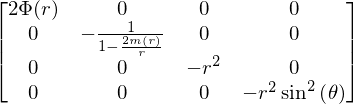

In [3]:
g(All, All)

Kontravariante Form der Metrik ($ g^{\mu\nu}$)

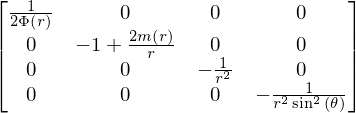

In [4]:
g(-All, -All)

Die Chistoffel Symbole in (kontravarianter Form): 
$$ \Gamma_{\rho \mu \nu} = g_{\rho \sigma}\Gamma^{\sigma}_{\ \mu \nu} = \frac{1}{2}(g_{\rho \mu| \nu} + g_{\rho \nu| \mu} - g_{\mu \nu| \rho})$$

Hier speziell $$ \Gamma_{2 2 2} = \Gamma_{r r r}$$

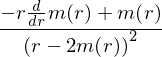

In [5]:
Ga = Christoffel('Ga', g)
Ga(2, 2, 2)

Der Riemann Tensor:
$$ R_{\mu \nu \rho \sigma} = \frac{\partial \Gamma_{\mu \nu \sigma}}{\partial x^{\rho}} - \frac{\partial \Gamma_{\mu \nu \rho}}{\partial x^{\sigma}} + \Gamma^{\alpha}_{\ \nu \sigma}\Gamma_{\mu \rho \alpha} - \Gamma^{\alpha}_{\ \nu \rho}\Gamma_{\mu \sigma \alpha} - \frac{\partial g_{\mu \alpha}}{\partial x^{\rho}}\Gamma^{\alpha}_{\ \nu \sigma} + \frac{\partial g_{\mu \alpha}}{\partial x^{\sigma}}\Gamma^{\alpha}_{\ \nu \rho} $$

Hier speziell $$ R_{1 3 1 3} =  R_{t \theta t \theta} $$

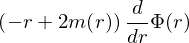

In [6]:
Rm = Riemann('Rm', g)
Rm(1,3,1,3)

Oder in gemischt kontra- kovarianter Form $$ R^{1}{}_{3 1 3} = R^{t}{}_{\theta t \theta}  $$

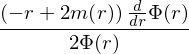

In [7]:
Rm(-1,3,1,3)

Der Ricci Tensor:

$$ R_{\mu \nu} = \frac{\partial \Gamma^{\sigma}_{\ \mu \nu}}{\partial x^{\sigma}} - \frac{\partial \Gamma^{\sigma}_{\ \mu \sigma}}{\partial x^{\nu}} + \Gamma^{\sigma}_{\ \mu \nu}\Gamma^{\rho}_{\ \sigma \rho} - \Gamma^{\rho}_{\ \mu \sigma}\Gamma^{\sigma}_{\ \nu \rho} $$

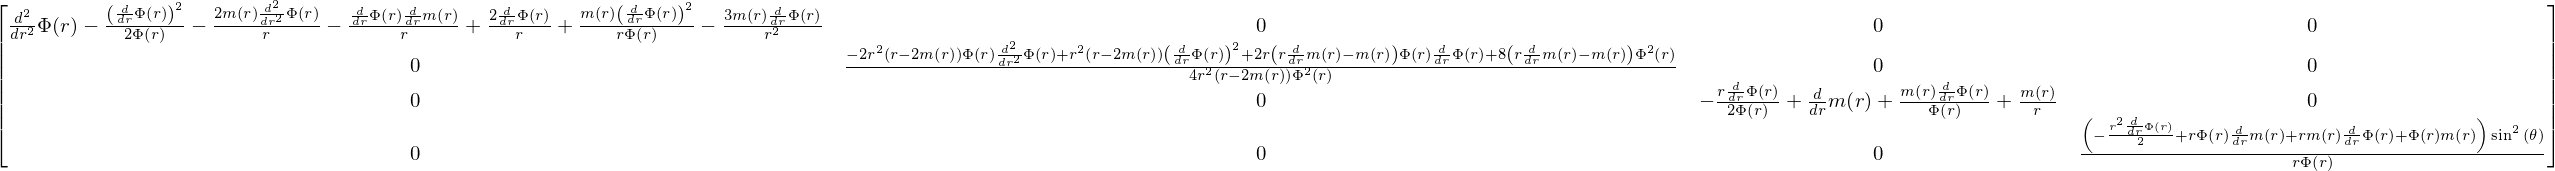

In [8]:
Ri = Ricci('Ri', g)
Ri(All, All)

Der Ricci Tensor lässt sich auch durch folgende Kontraktion aus dem Riemann Tensor berechnen:
$R_{\mu \nu} = R^{\rho}_{\ \mu \rho \nu} $

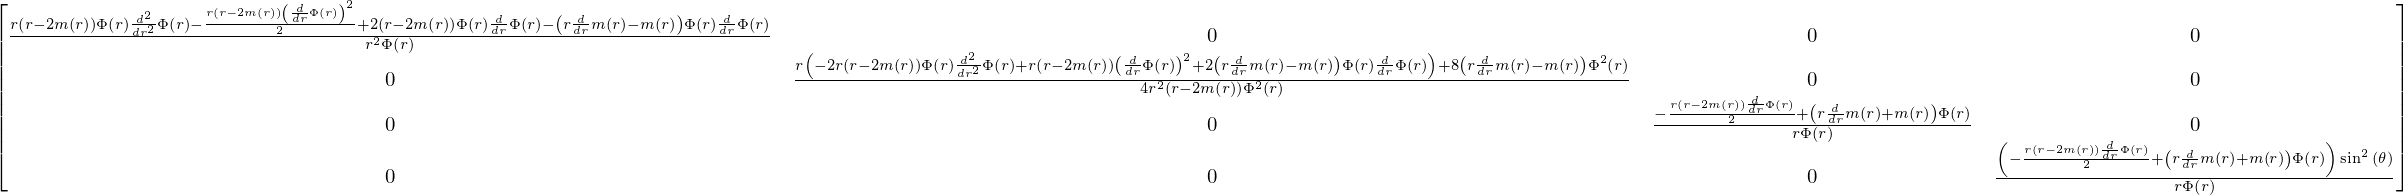

In [9]:
ricci = sum([Rm(i, All, k, All)*g(-i, -k)
             for i, k in list(variations(range(1, 5), 2, True))],
            zeros(4))
ricci.simplify()
ricci

Der Ricci Skalar ergibt sich aus der Kontraktion des Ricci Tensors: $R = R_{\mu}^{\ \mu} = g^{\mu \nu}R_{\mu \nu}$

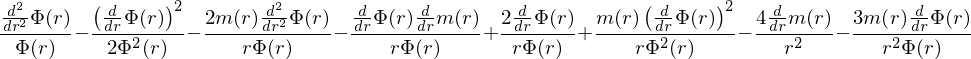

In [10]:
Ri.scalar()

Der Einstein Tensor:$$ G_{\mu \nu} = R_{\mu \nu} - \frac{1}{2}g_{\mu \nu}R $$

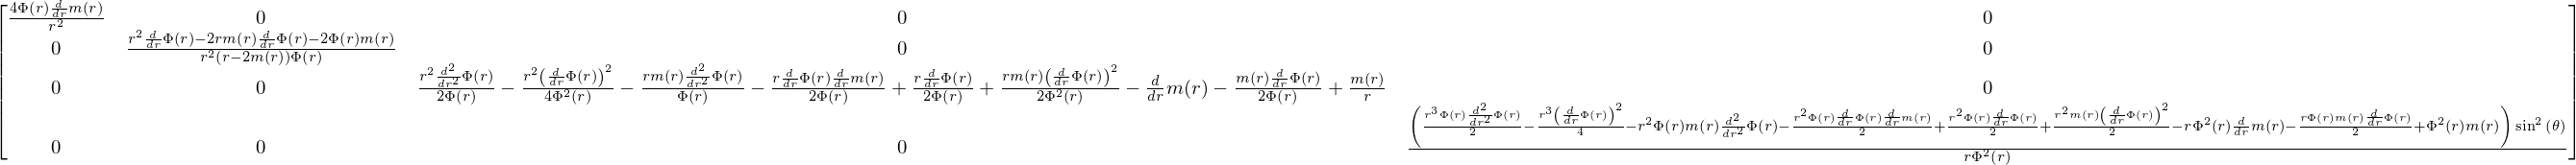

In [11]:
G = Einstein('G', Ri)
G(All, All)

Der Energie-Impuls Tensor (rechte Seite der Einsteingleichung) wird als ideale Flüssigkeit angesetzt:
$$ T^\mu{}\!_\nu=\left( \begin{array}{ccc} e(r) & 0 & 0 & 0\\ 0& -p(r)&  0&0 \\ 0&  0&  -p(r)& 0\\ 0&  0&  0& -p(r)\\ \end{array} \right) \quad  ,
$$
wobei die Funktionen $e(r)$ und $p(r)$ die Energiedichte und den Druck der Neutronensternmaterie darstellen, die ihrerseits &uuml;ber die Zustandsgleichung  $p(e)$ miteinander verknüpft sind.

Die Einstein Gleichung
$$ G^\mu{}\!_\nu = R^\mu{}\!_\nu - \frac{1}{2}g^\mu{}\!_\nu R =  8\pi T^\mu{}\!_\nu$$

stellt demnach (in dem betrachteten Fall) ein System von vier gekoppelten Differentialgleichungen zweiter Ordnung dar. 

In [43]:
e = Function('e')(r)
p = Function('p')(r)

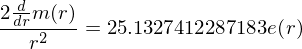

In [44]:
DGL1=sym.Eq(G(-1, 1), 8*math.pi*e)
DGL1

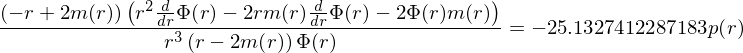

In [45]:
DGL2=sym.Eq(G(-2, 2), -8*math.pi*p)
DGL2

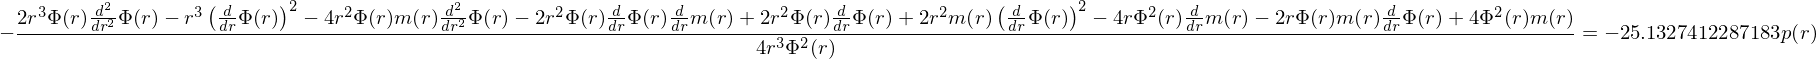

In [46]:
DGL3=sym.Eq(G(-3, 3), -8*math.pi*p)
DGL3

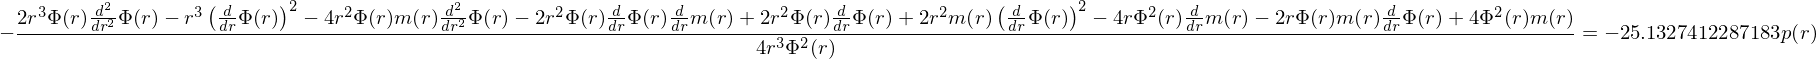

In [47]:
DGL4=sym.Eq(G(-4, 4), -8*math.pi*p)
DGL4

Im folgenden lösen wir die erste Gleichung der Einsteingleichung (tt-Komponente) nach $\frac{dm}{dr}$ und die zweite Gleichung (rr-Komponente) nach $\frac{d\Phi}{dr}$ auf.

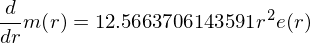

In [48]:
Eq1=sym.Eq(Fm.diff(r),sym.solve(DGL1,Fm.diff(r))[0])
Eq1

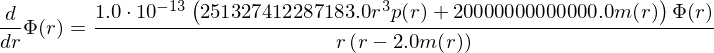

In [49]:
Eq2=sym.Eq(Fphi.diff(r),sym.solve(DGL2,Fphi.diff(r))[0])
Eq2

Aus der Einsteingleichung folgt die Erhaltung des Energie-Impulses. Diese sogenannten hydrodynamischen Gleichungen (kovariante Erhaltung des Energie-Impulses) sind durch die folgenden vier Gleichungen definiert (Bemerke: in der Literatur wird die kovariante Ableitung mit unterschiedlichen Symbolen bezeichnet):
$$
\nabla\!_\mu G^\mu{}\!_\nu = D\!_\mu G^\mu{}\!_\nu  =  G^\mu{}_{\nu \, ||\mu} = 0 \quad \rightarrow \quad \nabla\!_\mu T^\mu{}\!_\nu = 0 \quad ,
$$

wobei die kovariante Ableitung eines Tensors zweiter Stufe wie folgt definiert ist:
$$
\nabla\!_\alpha T^\mu{}\!_\nu = \partial_\alpha T^\mu{}\!_\nu + \Gamma^\mu_{\alpha \rho} T^\rho{}\!_\nu  - \Gamma^\rho_{\alpha \nu} T^\mu{}\!_\rho   \quad .
$$

Die kovariante Ableitung des Energie-Impulstensors $T^\mu{}\!_\nu$ berechnet sich wie folgt (hier ist z.B. die $\nabla\!_t T^t{}\!_r = \nabla\!_1 T^1{}\!_2$ ausgegeben)

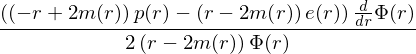

In [50]:
TM = sym.Matrix([[e*2*Fphi,0,0,0],[0,p/(1-2*Fm/r),0,0],[0,0,p*r**2,0],[0,0,0,p*r**2*sin(theta)**2]])
T = Tensor('T', 2, g, components=TM)
T.covariantD(-1,2,1)

Durch Kontraktion erhält man vier Gleichungen: $\nabla\!_\alpha T^\alpha{}\!_\nu=0\,\, \forall \, \nu=1,2,3,4$; die Gleichung für $\nu=2=r$ lautet:

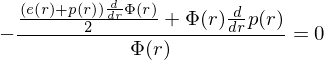

In [51]:
EqHydro2=sym.simplify(sym.Eq(T.covariantD(-1,2,1) + T.covariantD(-2,2,2) + T.covariantD(-3,2,3) + T.covariantD(-4,2,4),0))
EqHydro2

bzw. nach $\frac{d\Phi}{dr}$ umgeformt:

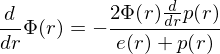

In [52]:
Eq3=sym.Eq(Fphi.diff(r),sym.solve(EqHydro2,Fphi.diff(r))[0])
Eq3

Durch Kombination dieser Gleichung mit der zweiten Einsteingleichung erhält man:

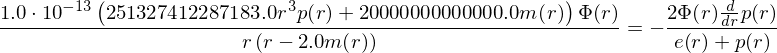

In [53]:
Eq4=sym.Eq(sym.solve(DGL2,Fphi.diff(r))[0],sym.solve(EqHydro2,Fphi.diff(r))[0])
Eq4

bzw. nach $\frac{dp}{dr}$ umgeformt:

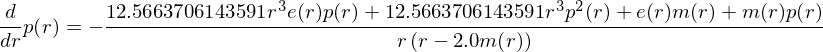

In [54]:
Eq5=sym.Eq(p.diff(r),sym.solve(Eq4,p.diff(r))[0])
Eq5

Man erhält somit das folgende System von Differentialgleichungen, die so genannten "Tolman-Oppenheimer-Volkoff Gleichung (TOV Gleichungen)"

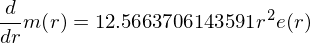

In [55]:
Eq1

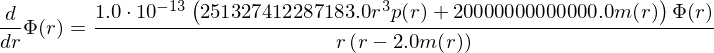

In [56]:
Eq2

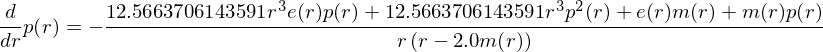

In [57]:
Eq5

### Numerische Lösung der TOV-Gleichungen 

Im folgenden werden die TOV Gleichungen numerisch gelöst, indem wir einerseits eine Zustandsgleichung der Materie (eine Funktion $p(e)$, hier speziell $p(e)=10\,e^{5/3}$)  festlegen und von einem Startwert der zentralen Energiedichte im Inneren des sphärisch symmetrischen Objektes nach Außen integrieren.

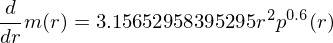

In [58]:
Eq1.subs(e,(p/10)**(3/5))

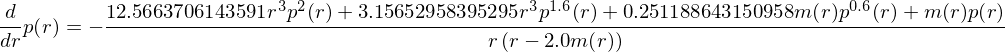

In [69]:
sym.simplify(Eq5.subs(e,(p/10)**(3/5)))

#### Lösen der TOV Gleichungen in Python

Um das zugrundeliegende System von Differentialgleichungen zu lösen, muss man ...-> Hausaufgabe!

In [86]:
from scipy.integrate import solve_ivp